# Relationship of salinity with SPG in EN4 and AVISO

### Fig 1 of Siddiqui_et_al


In [1]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
import cmocean

In [2]:
import cartopy.crs as ccrs
import matplotlib.pylab as pylab
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (18, 6),
         'axes.labelsize': '20',
         'axes.titlesize':'20',
         'xtick.labelsize':'20',
         'ytick.labelsize':'20'}
pylab.rcParams.update(params)

In [3]:
from matplotlib.patches import Polygon
%matplotlib inline

import warnings

import matplotlib.path                 as mpath
import cartopy.crs                     as ccrs
import cartopy.mpl.ticker              as ctk
import cartopy.feature as cfeature
import cartopy.mpl.patch as cpatch
import matplotlib as mpl

In [4]:
pylab.rcParams.update({
  "text.usetex": True
})
plt.rcParams['font.family'] = 'DeJavu Serif'
plt.rcParams['font.serif'] = ['Times New Roman']

In [5]:
import warnings
warnings.filterwarnings('ignore')

In [6]:
#!wget https://www.ngdc.noaa.gov/mgg/global/relief/ETOPO1/data/ice_surface/grid_registered/netcdf/ETOPO1_Ice_g_gmt4.grd.gz -P /export/scratch/asiddi24/

In [7]:
# Using ETOPO data only for plotting purposes. You can choose not to use this
grid = xr.open_dataset('/home/idies/workspace/Storage/asiddi24/persistent/SciServer/Chapter_1/Siddiqui_etal_JGR_2023/data/ETOPO/ETOPO1_Ice_g_gmt4.grd', decode_cf=True, engine='netcdf4')
grid

<xarray.Dataset>
Dimensions:  (x: 21601, y: 10801)
Coordinates:
  * x        (x) float64 -180.0 -180.0 -180.0 -179.9 ... 179.9 180.0 180.0 180.0
  * y        (y) float64 -90.0 -89.98 -89.97 -89.95 ... 89.95 89.97 89.98 90.0
Data variables:
    z        (y, x) float64 ...
Attributes:
    Conventions:  COARDS/CF-1.0
    title:        ETOPO1_Ice_g_gmt4.grd
    GMT_version:  4.4.0
    node_offset:  0

In [8]:
grid=grid.sel(y=slice(0,90))
grid=grid.where(grid.z>0)

In [9]:
grid = grid.load()

### Saving the EN4 dataset as annual mean

In [10]:
# ds = xr.open_mfdataset('/home/idies/workspace/Storage/asiddi24/persistent/SciServer/EN4/data/*.nc')
# ds

In [11]:
# ds = ds.isel(depth=0).sel(time=slice('1990-01-15', '2017-12-31'))
# ds

In [12]:
# salinity = ds.salinity.groupby('time.year').mean('time')
# salinity

In [13]:
# ds = salinity.to_dataset(name='en4_sal').load()
# ds

In [14]:
# ds.to_netcdf('en4_sal_annual.nc')

### Loading annual mean EN4 salinity

In [15]:
ds = xr.open_dataset('/home/idies/workspace/Storage/asiddi24/persistent/SciServer/Chapter_1/Siddiqui_etal_JGR_2023/data/EN4/en4_sal_annual.nc')
ds

<xarray.Dataset>
Dimensions:  (lat: 173, lon: 360, year: 28)
Coordinates:
    depth    float32 ...
  * lat      (lat) float32 -83.0 -82.0 -81.0 -80.0 -79.0 ... 86.0 87.0 88.0 89.0
  * lon      (lon) float32 1.0 2.0 3.0 4.0 5.0 ... 356.0 357.0 358.0 359.0 360.0
  * year     (year) int64 1990 1991 1992 1993 1994 ... 2013 2014 2015 2016 2017
Data variables:
    en4_sal  (year, lat, lon) float32 ...

In [16]:
ds = ds.sel(year=[1994, 2008,2016])
ds

<xarray.Dataset>
Dimensions:  (lat: 173, lon: 360, year: 3)
Coordinates:
    depth    float32 ...
  * lat      (lat) float32 -83.0 -82.0 -81.0 -80.0 -79.0 ... 86.0 87.0 88.0 89.0
  * lon      (lon) float32 1.0 2.0 3.0 4.0 5.0 ... 356.0 357.0 358.0 359.0 360.0
  * year     (year) int64 1994 2008 2016
Data variables:
    en4_sal  (year, lat, lon) float32 ...

### AVISO data

In [17]:
ds_aviso = xr.open_mfdataset('/home/idies/workspace/Storage/asiddi24/persistent/SciServer/Chapter_1/Siddiqui_etal_JGR_2023/data/aviso/dt*.nc')
ds_aviso

<xarray.Dataset>
Dimensions:           (time: 120, nv: 2, latitude: 720, longitude: 1440)
Coordinates:
  * time              (time) datetime64[ns] 1993-01-15 1993-02-15 ... 2016-12-15
  * latitude          (latitude) float32 -89.88 -89.62 -89.38 ... 89.62 89.88
  * longitude         (longitude) float32 0.125 0.375 0.625 ... 359.6 359.9
  * nv                (nv) int32 0 1
Data variables:
    climatology_bnds  (time, nv) datetime64[ns] dask.array<chunksize=(1, 2), meta=np.ndarray>
    lat_bnds          (time, latitude, nv) float32 dask.array<chunksize=(1, 720, 2), meta=np.ndarray>
    lon_bnds          (time, longitude, nv) float32 dask.array<chunksize=(1, 1440, 2), meta=np.ndarray>
    crs               (time) int32 -2147483647 -2147483647 ... -2147483647
    adt               (time, latitude, longitude) float64 dask.array<chunksize=(1, 720, 1440), meta=np.ndarray>
Attributes: (12/38)
    cdm_data_type:                   Grid
    date_issued:                     2022-01-21 11:35:22Z
    time_coverage_resolution:        P1M
    creator_email:                   aviso@altimetry.fr
    product_version:                 7.0
    references:                      www.aviso.altimetry.fr
    ...                              ...
    geospatial_vertical_min:         0.0
    geospatial_vertical_max:         0.0
    geospatial_lat_units:            degrees_north
    geospatial_lon_units:            degrees_east
    geospatial_lat_resolution:       0.25
    geospatial_lon_resolution:       0.25

In [18]:
#ds_aviso = ds_aviso.drop(['adt','crs','lat_bnds','lon_bnds','climatology_bnds']).sel(latitude=slice(0,90)).load()

### Spatial filtering

In [19]:
import gcm_filters

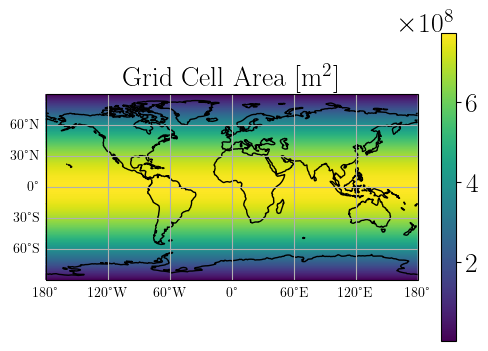

In [20]:
#Taken from https://gcm-filters.readthedocs.io/en/latest/examples/example_satellite_observations.html

# -- compute cell area -- 
# -- for each lat/lon grid box gcm-filters needs area in same format as du,dv
dy0 = 1852*60*np.abs(ds_aviso['latitude'][2].data - ds_aviso['latitude'][1].data)
# ** note: dy0 is a constant over the globe ** 
dx0 = 1852*60*np.cos(np.deg2rad(ds_aviso['latitude'].data))*(ds_aviso['longitude'][2].data - ds_aviso['longitude'][1].data) 
area = dy0*np.tile(dx0, (len(ds_aviso['longitude'].data),1))
area = np.transpose(area)
dA = xr.DataArray(
    data=area,
    dims=["latitude", "longitude"],
    coords=dict(
    longitude=(["longitude"], ds_aviso['longitude'].data), latitude=(["latitude"], ds_aviso['latitude'].data),),
)
area_cmap = 'viridis'       # colormap 
f,ax = plt.subplots(1,1,figsize=(6,4),subplot_kw={'projection':ccrs.PlateCarree()})
dA.plot(ax=ax, cmap=area_cmap)
ax.set_title('Grid Cell Area [m$^2$]')
ax.coastlines()
gl = ax.gridlines(draw_labels=True)
gl.xlabels_top = False
gl.ylabels_right = False
plt.show()

In [21]:
# -- wet mask -- 
# -- land = 0, water = 1 -- 
wetMask = xr.where(np.isnan(ds_aviso['adt']), 0, 1)
wetMask

<xarray.DataArray 'adt' (time: 120, latitude: 720, longitude: 1440)>
dask.array<where, shape=(120, 720, 1440), dtype=int64, chunksize=(1, 720, 1440), chunktype=numpy.ndarray>
Coordinates:
  * time       (time) datetime64[ns] 1993-01-15 1993-02-15 ... 2016-12-15
  * latitude   (latitude) float32 -89.88 -89.62 -89.38 ... 89.38 89.62 89.88
  * longitude  (longitude) float32 0.125 0.375 0.625 0.875 ... 359.4 359.6 359.9

In [22]:
# -- call gcm-filters and select desired grid type -- 
gcm_filters.required_grid_vars(gcm_filters.GridType.REGULAR_WITH_LAND_AREA_WEIGHTED)

['area', 'wet_mask']

In [23]:
# -- choose a filtering scale -- 
filter_scale = 6
dx_min = 1
# -- initialze filter object for two filter types -- 
specs = {
    'filter_scale': filter_scale,
    'dx_min': dx_min,
    'grid_type': gcm_filters.GridType.REGULAR_WITH_LAND_AREA_WEIGHTED,
    'grid_vars': {'area': dA, 'wet_mask': wetMask}
}
# GAUSSIAN 
filter_simple_fixed_factor_G = gcm_filters.Filter(filter_shape=gcm_filters.FilterShape.GAUSSIAN, **specs)
# TAPER 
filter_simple_fixed_factor_T = gcm_filters.Filter(filter_shape=gcm_filters.FilterShape.TAPER, **specs)


In [24]:
filter_simple_fixed_factor_T

Filter(filter_scale=6, dx_min=1, filter_shape=<FilterShape.TAPER: 2>, transition_width=3.141592653589793, ndim=2, n_steps=24, grid_type=<GridType.REGULAR_WITH_LAND_AREA_WEIGHTED: 4>)

In [25]:
# -- filter SSH (for both Gaussian and Taper kernels) -- 
adt_filtered_simple_fixed_factor = filter_simple_fixed_factor_G.apply(ds_aviso['adt'], dims=['latitude', 'longitude'])
adt_filtered_simple_fixed_factor_T = filter_simple_fixed_factor_T.apply(ds_aviso['adt'], dims=['latitude', 'longitude'])

### Loading MDT

In [26]:
# ds_mdt = xr.open_dataset('data/aviso/dataset-mdt-cnes-cls18-global_1657604020672.nc').load()
# ds_mdt

In [27]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.colors import ListedColormap, LinearSegmentedColormap

def plot_examples(colormaps):
    """
    Helper function to plot data with associated colormap.
    """
    np.random.seed(19680801)
    data = np.random.randn(30, 30)
    n = len(colormaps)
    fig, axs = plt.subplots(1, n, figsize=(n * 2 + 2, 3),
                            constrained_layout=True, squeeze=False)
    for [ax, cmap] in zip(axs.flat, colormaps):
        psm = ax.pcolormesh(data, cmap=cmap, rasterized=True, vmin=-4, vmax=4)
        fig.colorbar(psm, ax=ax)
    plt.show()


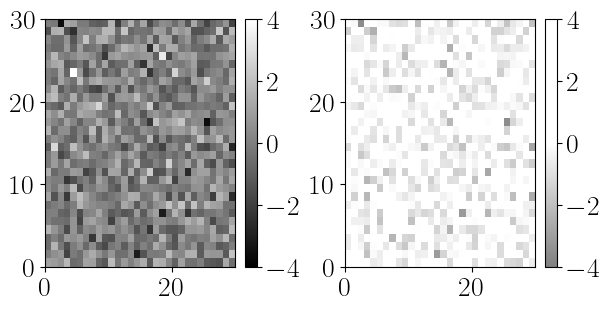

In [28]:
viridis = cm.get_cmap('gray', 256)
viridis_big = cm.get_cmap('gray')
newcmp = ListedColormap(viridis_big(np.linspace(0.5,1.5, 128)))
plot_examples([viridis, newcmp])

In [29]:
import cartopy.feature as cfeature
land_50m = cfeature.NaturalEarthFeature('physical', 'land', '50m',
                                        edgecolor='face',
                                        facecolor='gray')

### Adding cyclic point for the data for plotting purposes

In [30]:
from cartopy.util import add_cyclic_point

# Add cyclic point to data
data=ds['en4_sal']
data, lons = add_cyclic_point(data, coord=ds['lon'])
# data_2008_aviso = ds_aviso['adt_2008']
# data_2016_aviso = ds_aviso['adt_2016']
# data_mdt_aviso = ds_mdt['mdt']

# data_2008_aviso, lons_aviso = add_cyclic_point(data_2008_aviso, coord=ds_aviso['longitude'])
# data_2016_aviso, lons_aviso = add_cyclic_point(data_2016_aviso, coord=ds_aviso['longitude'])
# data_mdt_aviso, lons_aviso_mdt = add_cyclic_point(data_mdt_aviso, coord=ds_mdt['longitude'])


### Plot with ADT contours

CPU times: user 3min 31s, sys: 14.1 s, total: 3min 45s
Wall time: 2min 46s


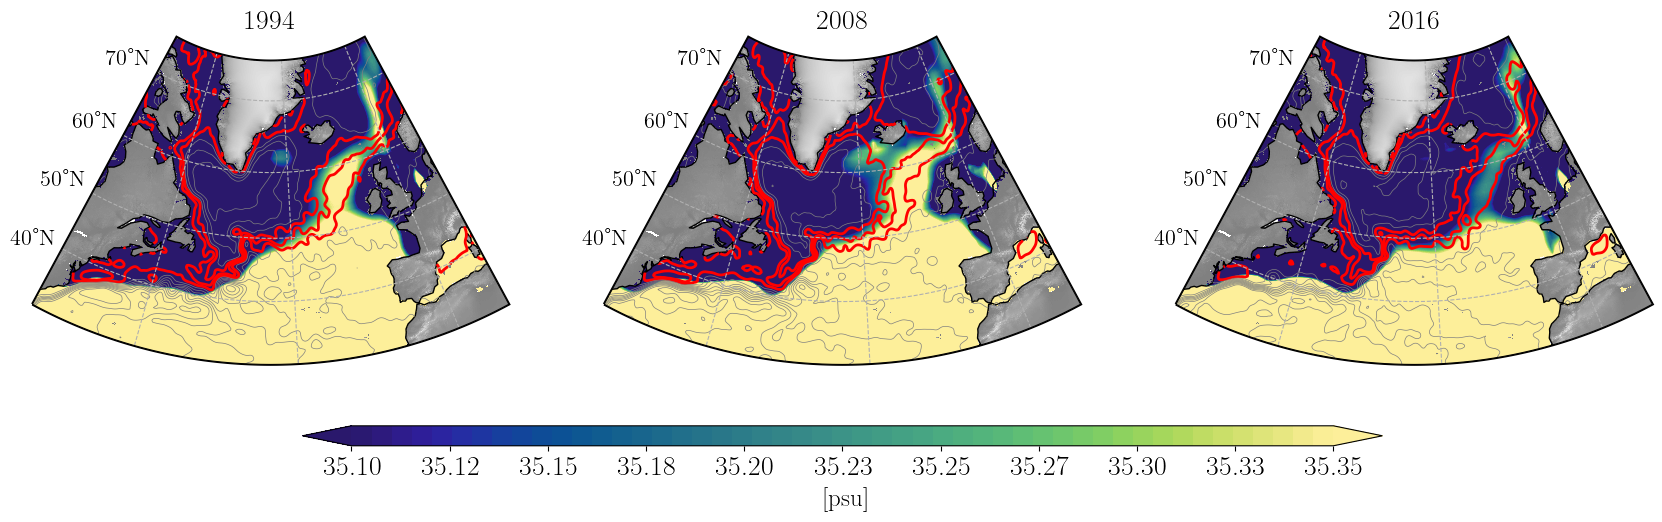

In [34]:
%%time
# fixed a plotting issue by bumping numpy to 1.22.0

from matplotlib.colors import BoundaryNorm
from matplotlib.ticker import MaxNLocator
pylab.rcParams['contour.negative_linestyle'] = 'solid'

# defining the projection 
lon1, lon2, lat1, lat2 = [-80, 10, 30, 75]

rect = mpath.Path([[lon1, lat1], [lon2, lat1],
    [lon2, lat2], [lon1, lat2], [lon1, lat1]], closed=True).interpolated(150)

name='LambertConformal'
proj=ccrs.LambertConformal(central_longitude=(lon1+lon2)*0.5,
    central_latitude=(lat1+lat2)*0.5)


# Define the figure and each axis for the 3 rows and 3 columns
fig, axs = plt.subplots(nrows=1,ncols=3,
                        subplot_kw={'projection': proj},
                        figsize=(18,10), frameon=True)

# axs is a 2 dimensional array of `GeoAxes`.  We will flatten it into a 1-D array
axs=axs.flatten()
                        
                        
# defining levels for the pcolormesh
cmap = cmocean.cm.balance
levels = MaxNLocator(nbins=100).tick_values(35.1,35.35)
norm = BoundaryNorm(levels, ncolors=cmap.N, clip=True)

#Loop over all of the years
for i,year in enumerate(ds.en4_sal.year):

        # pcolormesh plot
        im = axs[i].contourf(lons, ds.en4_sal.lat, data[i,:,:], cmap=cmocean.cm.haline,
                   #norm=norm,
                   levels=np.linspace(35.1,35.35,50), extend='both',          
                   transform=ccrs.PlateCarree(),
                   zorder=-10)
        
        if i==0:
            c = axs[i].contour(ds_aviso.longitude, ds_aviso.latitude, adt_filtered_simple_fixed_factor.sel(time=slice('1993-01', '1993-12')).mean('time').squeeze(),  [-0.3,-0.2,-0.1],linewidths=[2], colors='red',
                #norm=norm,
                #extend='both',          
                transform=ccrs.PlateCarree())   
            c1 = axs[i].contour(ds_aviso.longitude, ds_aviso.latitude, adt_filtered_simple_fixed_factor.sel(time=slice('1993-01', '1993-12')).mean('time').squeeze(),  [-0.8,-0.7,-0.6, -0.5, -0.4,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8], linewidths=[0.5], colors='gray',
                #norm=norm,
                #extend='both',          
                transform=ccrs.PlateCarree())  
            
        if i==1:
            c = axs[i].contour(ds_aviso.longitude, ds_aviso.latitude, adt_filtered_simple_fixed_factor.sel(time=slice('2007-01', '2007-12')).mean('time').squeeze(),  [-0.3,-0.2,-0.1], linewidths=[2], colors='red',
                #norm=norm,
                #extend='both',          
                transform=ccrs.PlateCarree())   
            c1 = axs[i].contour(ds_aviso.longitude, ds_aviso.latitude, adt_filtered_simple_fixed_factor.sel(time=slice('2007-01', '2007-12')).mean('time').squeeze(),  [-0.8,-0.7,-0.6, -0.5, -0.4,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8], linewidths=[0.5], colors='gray',
                #norm=norm,
                #extend='both',          
                transform=ccrs.PlateCarree())   
                        
        if i==2:
            c = axs[i].contour(ds_aviso.longitude, ds_aviso.latitude, adt_filtered_simple_fixed_factor.sel(time=slice('2015-01', '2015-12')).mean('time').squeeze(),  [-0.3,-0.2,-0.1],linewidths=[2], colors='red',
                #norm=norm,
                #extend='both',          
                transform=ccrs.PlateCarree())   
            c1 = axs[i].contour(ds_aviso.longitude, ds_aviso.latitude, adt_filtered_simple_fixed_factor.sel(time=slice('2015-01', '2015-12')).mean('time').squeeze(),  [-0.8,-0.7,-0.6, -0.5, -0.4,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8], linewidths=[0.5], colors='gray',
                #norm=norm,
                #extend='both',          
                transform=ccrs.PlateCarree())  
            
        
        #axs[i].contour(lons, ds.en4_sal.lat, data[i,:,:], [35.2], colors='k', transform=ccrs.PlateCarree())
        # Adding etopop
        axs[i].pcolormesh(grid.x[::6], grid.y[::6], grid.z[::6,::6], transform=ccrs.PlateCarree(), cmap=newcmp, zorder=-10)

        # Title each subplot with the name of the model
        axs[i].set_title(year.values)
        
        proj_to_data = ccrs.PlateCarree()._as_mpl_transform(axs[i]) - axs[i].transData
        rect_in_target = proj_to_data.transform_path(rect)

        axs[i].set_boundary(rect_in_target)
        axs[i].set_xlim(rect_in_target.vertices[:,0].min(), rect_in_target.vertices[:,0].max())
        axs[i].set_ylim(rect_in_target.vertices[:,1].min(), rect_in_target.vertices[:,1].max())
        axs[i].coastlines()
        axs[i].patch.set_edgecolor('black')  
        axs[i].patch.set_linewidth(2)  
        #axs[i].add_feature(land_50m) 
        #axs[i].set_facecolor('black')


        gl=axs[i].gridlines(draw_labels=True, x_inline=False, y_inline=False, linestyle='dashed')
        gl.top_labels=False
        gl.right_labels=False
        gl.bottom_labels=False
        gl.rotate_labels=False
        gl.xlocator=ctk.LongitudeLocator(4)
        gl.ylocator=ctk.LatitudeLocator(6)
        gl.xformatter=ctk.LongitudeFormatter(zero_direction_label=True)
        gl.yformatter=ctk.LatitudeFormatter()
        gl.xlabel_style = {'size': 12, 'color': 'white'}
        gl.ylabel_style = {'size': 16, 'color': 'black', 'va': 'bottom', 'ha':'right'}
         
            
        axs[i].set_rasterization_zorder(0)


# Adjust the location of the subplots on the page to make room for the colorbar
fig.subplots_adjust(bottom=0.23, top=0.9, left=0.05, right=0.95,
                    wspace=0.2, hspace=0.2)  

# Add a colorbar axis at the bottom of the graph
cbar_ax = fig.add_axes([0.2, 0.32, 0.6, 0.02])

# Draw the colorbar
cbar=fig.colorbar(im, cax=cbar_ax,orientation='horizontal', format='%.2f', ticks=np.linspace(35.10,35.35,11))
plt.figtext(0.49,0.26, r'[psu]', fontsize=18)

#plt.suptitle('annual mean salinity for 1993 and 1998', fontsize=18)

plt.savefig('figs/Fig_1.pdf', bbox_inches='tight', dpi=300)    